In [2]:
from FlagEmbedding import BGEM3FlagModel

model = BGEM3FlagModel('/MoE-Example/Router/Router_CT',  
                       use_fp16=True) # Setting use_fp16 to True speeds up computation with a slight performance degradation

The parameters of colbert_linear and sparse linear is new initialize. Make sure the model is loaded for training, not inferencing
----------using 8*GPUs----------


In [61]:
MoE_list_update.to_csv('Router/MoE_list_update_top_2.csv')

In [1]:
import pandas as pd
MoE_list_update = pd.read_csv('Router/MoE_list_update_top_2.csv',index_col=0)

In [2]:
MoE_list_update

,pos,neg,expert,query,expert_predict,domain,cross-dataset,cross-task
0,"['Mistral|amazon_google-MoE-CT', 'Mistral|semi...",[],Mistral|amazon_google-MoE-CT,You are an expert in detecting if two text des...,"['Mistral|amazon_google-MoE-CT', 'Mistral|semi...",Mistral|amazon_google-MoE-CT,"['Mistral|semi_text_w-MoE-CT', 'Mistral|SimTab...","['Mistral|SimTab-MoE-CT', 'Mistral|walmart-MoE..."
1,"['Mistral|amazon_google-MoE-CT', 'Mistral|semi...",[],Mistral|amazon_google-MoE-CT,You are an expert in detecting if two text des...,"['Mistral|amazon_google-MoE-CT', 'Mistral|SimT...",Mistral|amazon_google-MoE-CT,"['Mistral|SimTab-MoE-CT', 'Mistral|semi_text_w...","['Mistral|SimTab-MoE-CT', 'Mistral|walmart-MoE..."
2,"['Mistral|amazon_google-MoE-CT', 'Mistral|semi...",[],Mistral|amazon_google-MoE-CT,You are an expert in detecting if two text des...,"['Mistral|amazon_google-MoE-CT', 'Mistral|walm...",Mistral|amazon_google-MoE-CT,"['Mistral|walmart-MoE-CT', 'Mistral|semi_text_...","['Mistral|walmart-MoE-CT', 'Mistral|SimTab-MoE..."
3,"['Mistral|amazon_google-MoE-CT', 'Mistral|semi...",[],Mistral|amazon_google-MoE-CT,You are an expert in detecting if two text des...,"['Mistral|amazon_google-MoE-CT', 'Mistral|semi...",Mistral|amazon_google-MoE-CT,"['Mistral|semi_text_w-MoE-CT', 'Mistral|SimTab...","['Mistral|SimTab-MoE-CT', 'Mistral|walmart-MoE..."
4,"['Mistral|amazon_google-MoE-CT', 'Mistral|semi...",[],Mistral|amazon_google-MoE-CT,You are an expert in detecting if two text des...,"['Mistral|amazon_google-MoE-CT', 'Mistral|semi...",Mistral|amazon_google-MoE-CT,"['Mistral|semi_text_w-MoE-CT', 'Mistral|SimTab...","['Mistral|SimTab-MoE-CT', 'Mistral|walmart-MoE..."
...,...,...,...,...,...,...,...,...
29582,"['Mistral|semi_text_w-MoE-CT', 'Mistral|webtab...","['Mistral|amazon_google-MoE-CT', 'Mistral|rest...",Mistral|amazon_google-MoE-CT,You are an expert in relation extraction from ...,"['Mistral|SimTab-MoE-CT', 'Mistral|webtable-Mo...",Mistral|SimTab-MoE-CT,"['Mistral|webtable-MoE-CT', 'Mistral|restauran...","['Mistral|restaurant-MoE-CT', 'Mistral|semi_te..."
29583,"['Mistral|semi_text_w-MoE-CT', 'Mistral|webtab...","['Mistral|amazon_google-MoE-CT', 'Mistral|SimT...",Mistral|amazon_google-MoE-CT,You are an expert in relation extraction from ...,"['Mistral|SimTab-MoE-CT', 'Mistral|webtable-Mo...",Mistral|SimTab-MoE-CT,"['Mistral|webtable-MoE-CT', 'Mistral|restauran...","['Mistral|restaurant-MoE-CT', 'Mistral|semi_te..."
29584,"['Mistral|amazon_google-MoE-CT', 'Mistral|webt...","['Mistral|semi_text_w-MoE-CT', 'Mistral|restau...",Mistral|amazon_google-MoE-CT,You are an expert in relation extraction from ...,"['Mistral|SimTab-MoE-CT', 'Mistral|webtable-Mo...",Mistral|SimTab-MoE-CT,"['Mistral|webtable-MoE-CT', 'Mistral|restauran...","['Mistral|restaurant-MoE-CT', 'Mistral|semi_te..."
29585,['Mistral|webtable-MoE-CT'],"['Mistral|amazon_google-MoE-CT', 'Mistral|semi...",Mistral|amazon_google-MoE-CT,You are an expert in relation extraction from ...,"['Mistral|SimTab-MoE-CT', 'Mistral|webtable-Mo...",Mistral|SimTab-MoE-CT,"['Mistral|webtable-MoE-CT', 'Mistral|restauran...","['Mistral|restaurant-MoE-CT', 'Mistral|semi_te..."


In [8]:
domain

array(['Mistral|amazon_google-MoE-CT', 'Mistral|semi_text_w-MoE-CT',
       'Mistral|walmart-MoE-CT', 'Mistral|restaurant-MoE-CT',
       'Mistral|webtable-MoE-CT', 'Mistral|SimTab-MoE-CT'], dtype=object)

In [5]:
import os 
import numpy as np
import pandas as pd 
from tqdm import tqdm
import pandas as pd
tqdm.pandas(desc='pandas bar')
# from pandarallel import pandarallel
import random
from tqdm.notebook import tqdm
import copy
import logging
# pandarallel.initialize(progress_bar=True)

import argparse
from types import SimpleNamespace
from FlagEmbedding import FlagModel

In [4]:
import os

def list_csv_files_and_parents(folder_path):
    """
    List all CSV files in the specified folder and their parent folder names.

    Parameters:
    folder_path (str): The path to the directory.

    Returns:
    list: A list where each element is a list containing the parent folder name and CSV file path.
    """
    csv_files_info = []

    # 遍历指定路径内的所有文件和文件夹
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".csv"):
                # 获取CSV文件的路径
                csv_file_path = os.path.join(root, file)
                # 获取CSV文件所在一级父文件夹名字
                parent_folder_name = os.path.basename(root)
                # 将父文件夹名字和CSV文件路径添加到列表中
                csv_files_info.append([parent_folder_name, csv_file_path])

    return csv_files_info

# 示例路径
folder_path = "your_folder_path"

# 调用函数
csv_files_info_list = list_csv_files_and_parents('inference_MoE')
# print(csv_files_info_list)


In [24]:
for i in range(6):
    print((csv_files_info_list[i][1].split('/')[-1].replace('.csv',''),csv_files_info_list[i][0]))
for i in range(6):
    k = 6*i
    print((csv_files_info_list[k][0]))

('mistral-7b-amazon-google-test', 'Mistral|amazon_google-MoE-CT')
('mistral-7b-semi-text-w-test-MoE', 'Mistral|amazon_google-MoE-CT')
('mistral-7b-walmart_test_output_wide', 'Mistral|amazon_google-MoE-CT')
('mistral-7b-restaurant_test_output_wide', 'Mistral|amazon_google-MoE-CT')
('mistral-7b-WebTable_Test_few', 'Mistral|amazon_google-MoE-CT')
('mistral-7b-SimTab_test_few', 'Mistral|amazon_google-MoE-CT')
Mistral|amazon_google-MoE-CT
Mistral|semi_text_w-MoE-CT
Mistral|webtable-MoE-CT
Mistral|SimTab-MoE-CT
Mistral|restaurant-MoE-CT
Mistral|walmart-MoE-CT


In [ ]:
lora_path_dict = {'hospital':'/home/yanmy/LLaMA-Factory-main/lora_weight/MoE/hospital-train-MoE-Llama-2-7b',
                  'beer':'/home/yanmy/LLaMA-Factory-main/lora_weight/MoE/beer-train-MoE-Llama-2-7b',
                  'rayyan':'/home/yanmy/LLaMA-Factory-main/lora_weight/MoE/rayyan-train-MoE-Llama-2-7b',
                  'merge-linear':'/home/yanmy/LLaMA-Factory-main/lora_weight/MoE/data-cleaning-adapter',
                  'merge-cat':'/home/yanmy/LLaMA-Factory-main/lora_weight/MoE/data-cleaning-adapter-cat',
                  'merge-hospital-linear':'/home/yanmy/LLaMA-Factory-main/lora_weight/MoE/data-cleaning-adapter-hospital',
                  'Mixtral-baseline':'/home/yanmy/LLaMA-Factory-main/lora_weight/Mixtral-baseline-MTL',
                  'jellyfish-baseline':'/home/yanmy/LLaMA-Factory-main/lora_weight/jellyfish-baseline-MTL',
                  'MoE-CT-amazon-google':'/home/yanmy/LLaMA-Factory-main/lora_weight/MoE_CT/add/Mistral/amazon_google-MoE-CT'}

In [25]:
Mapping_file = {'mistral-7b-amazon-google-test':'Mistral|amazon_google-MoE-CT',
                'mistral-7b-semi-text-w-test-MoE': 'Mistral|semi_text_w-MoE-CT',
                'mistral-7b-WebTable_Test_few':'Mistral|webtable-MoE-CT',
                'mistral-7b-walmart_test_output_wide':'Mistral|walmart-MoE-CT',
                'mistral-7b-restaurant_test_output_wide':'Mistral|restaurant-MoE-CT',
                'mistral-7b-SimTab_test_few':'Mistral|SimTab-MoE-CT'
                }

In [34]:
Domain_Dict = {'Mistral|amazon_google-MoE-CT':['Mistral|amazon_google-MoE-CT','Mistral|semi_text_w-MoE-CT'],
               'Mistral|semi_text_w-MoE-CT':['Mistral|amazon_google-MoE-CT','Mistral|semi_text_w-MoE-CT'],
               'Mistral|webtable-MoE-CT':['Mistral|webtable-MoE-CT','Mistral|SimTab-MoE-CT'],
               'Mistral|SimTab-MoE-CT':['Mistral|webtable-MoE-CT','Mistral|SimTab-MoE-CT'],
               'Mistral|restaurant-MoE-CT':['Mistral|restaurant-MoE-CT','Mistral|walmart-MoE-CT'],
               'Mistral|walmart-MoE-CT':['Mistral|restaurant-MoE-CT','Mistral|walmart-MoE-CT']
               }

In [26]:
MoE_list.to_csv('Router/MoE_list_update.csv')

In [ ]:
MoE_dict = {}
def AST(row):
    output = row['output'].strip()
    predict = row['predict'].strip()
    output_item = list(eval(output).values())[0]
    try:
        predict_item = list(eval(predict).values())[0]
    except:
        predict_item = ''
    row['output_item'] = output_item.lower().strip()
    row['predict_item'] = predict_item.lower().strip()
    return row
for expert_path in tqdm(csv_files_info_list):
    # for expert,file_path in expert_path:
        expert = expert_path[0]
        file_path = expert_path[1]
        df = pd.read_csv(file_path,index_col=0)
        df['expert'] = expert
        df = df.progress_apply(AST,axis=1)
        for index,row in df.iterrows():
            query = row['instruction']
            if(not MoE_dict.__contains__(query)):
                MoE_dict[query] = {}
                MoE_dict[query]['pos'] = []
                MoE_dict[query]['neg'] = []
                MoE_dict[query]['domain'] = Mapping_file[file_path.split('/')[-1].replace('.csv','')]
            if(row['output_item']==row['predict_item']):
                tmp = MoE_dict[query]['pos']
                tmp.append(expert)
                MoE_dict[query]['pos'] = tmp
            else:
                tmp = MoE_dict[query]['neg']
                tmp.append(expert)
                MoE_dict[query]['neg'] = tmp

In [29]:
MoE_list = pd.DataFrame(MoE_dict).T
MoE_list['query'] = MoE_list.index
MoE_list = MoE_list.reset_index(drop=True)

In [31]:
MoE_list_update['domain'] = MoE_list['domain']

In [36]:
### From Here we Construct the Cross-Task and Cross-Domain Evaluation selection(top-2) for experts per example
k = 2
def Cross_Domain_Selection(row):
    domain = row['domain']
    expert_predict = eval(row['expert_predict'])
    row['cross-dataset'] = [e for e in expert_predict if e!=domain][:k]
    row['cross-task'] = [e for e in expert_predict if e not in Domain_Dict[domain]][:k]
    return row
MoE_list_update = MoE_list_update.progress_apply(Cross_Domain_Selection,axis=1)

pandas bar: 100%|██████████| 29587/29587 [00:19<00:00, 1503.82it/s]


In [39]:
expert_list = []
for index,row in MoE_list_update.iterrows():
    expert_list.append(set(row['cross-dataset'])) if set(row['cross-dataset']) not in expert_list else None
    expert_list.append(set(row['cross-task'])) if set(row['cross-task']) not in expert_list else None

In [1]:
from transformers import AutoModelForCausalLM
import torch
# 加载基础模型
from peft import PeftModel
base_model = AutoModelForCausalLM.from_pretrained("Mistral-7B-Instruct-v0.2",device_map='auto') ## 专家A,domain expert

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

/home/wangys/anaconda3/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [2]:
peft_model_id = "lora_weight/MoE_CT/add/Mistral/amazon_google-MoE-CT"
model = PeftModel.from_pretrained(base_model, model_id=peft_model_id,adapter_name='Mistral|amazon_google-MoE-CT')

In [ ]:
model.load_adapter("lora_weight/MoE_CT/add/Mistral/amazon_google-MoE-CT", adapter_name="Mistral|amazon_google-MoE-CT")
model.load_adapter("lora_weight/MoE_CT/add/Mistral/restaurant-MoE-CT", adapter_name="Mistral|restaurant-MoE-CT")
model.load_adapter("lora_weight/MoE_CT/add/Mistral/semi_text_w-MoE-CT", adapter_name="Mistral|semi_text_w-MoE-CT")
model.load_adapter("lora_weight/MoE_CT/add/Mistral/SimTab-MoE-CT", adapter_name="Mistral|SimTab-MoE-CT")
model.load_adapter("lora_weight/MoE_CT/add/Mistral/walmart-MoE-CT", adapter_name="Mistral|walmart-MoE-CT")
model.load_adapter("lora_weight/MoE_CT/add/Mistral/webtable-MoE-CT", adapter_name="Mistral|webtable-MoE-CT")


## From here we mixture multiple experts for vary experts number k experiments


In [2]:
peft_model_id = "lora_weight/MoE/add/Mistral/amazon_google-MoE-Add"
model = PeftModel.from_pretrained(base_model, model_id=peft_model_id,adapter_name='amazon-google')

In [ ]:
model.load_adapter("lora_weight/MoE/add/Mistral/amazon_train-MoE-Add", adapter_name="amazon")
model.load_adapter("lora_weight/MoE/add/Mistral/ant_buy-MoE-Add", adapter_name="ant-buy")
model.load_adapter("lora_weight/MoE/add/Mistral/CMS_train-MoE-Add", adapter_name="CMS")
model.load_adapter("lora_weight/MoE/add/Mistral/restaurant_train-MoE-Add", adapter_name="restaurant")
model.load_adapter("lora_weight/MoE/add/Mistral/semi_text_c-MoE-Add", adapter_name="semi-text-c")
model.load_adapter("lora_weight/MoE/add/Mistral/semi_text_w-MoE-Add", adapter_name="semi-text-w")
model.load_adapter("lora_weight/MoE/add/Mistral/walmart_amazon-MoE-Add", adapter_name="walmart-amazon")
model.load_adapter("lora_weight/MoE/add/Mistral/walmart_train-MoE-Add", adapter_name="walmart")
model.load_adapter("lora_weight/MoE/add/Mistral/wdc_all-MoE-Add", adapter_name="wdc-all")
model.load_adapter("lora_weight/CTA/CTA_SimTab_train_init", adapter_name="SimTab")
model.load_adapter("lora_weight/CTA/CTA_WebTable_train_init", adapter_name="WebTable")
model.load_adapter("lora_weight/MoE/add/Mistral/hospital_train-MoE-Add", adapter_name="hospital")
model.load_adapter("lora_weight/MoE/add/Mistral/beer_train-MoE-Add", adapter_name="beer")
model.load_adapter("lora_weight/MoE/add/Mistral/rayyan_train-MoE-Add", adapter_name="rayyan")

In [4]:
adapter_sequence = ["beer",'hospital','rayyan','wdc-all','walmart-amazon','WebTable','SimTab',"ant-buy"]

In [5]:
model.add_weighted_adapter(
    adapters=adapter_sequence[:1],
    weights=[1],
    adapter_name="Expert-1",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=adapter_sequence[:2],
    weights=[0.5,0.5],
    adapter_name="Expert-2",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=adapter_sequence[:3],
    weights=[0.3,0.3,0.4],
    adapter_name="Expert-3",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=adapter_sequence[:4],
    weights=[0.25,0.25,0.25,0.25],
    adapter_name="Expert-4",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=adapter_sequence[:5],
    weights=[0.2, 0.2, 0.2, 0.2, 0.2],
    adapter_name="Expert-5",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=adapter_sequence[:6],
    weights=[0.16, 0.16, 0.2, 0.16,0.16,0.16,],
    adapter_name="Expert-6",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=adapter_sequence[:7],
    weights=[0.1,0.1,0.4,0.1,0.1,0.1,0.1],
    adapter_name="Expert-7",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=adapter_sequence[:8],
    weights=[0.1,0.1,0.3,0.1,0.1,0.1,0.1,0.1],
    adapter_name="Expert-8",
    combination_type="cat"
)

In [4]:
model.add_weighted_adapter(
    adapters=["ant-buy"],
    weights=[1],
    adapter_name="Expert-1",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["ant-buy","amazon-google"],
    weights=[0.5,0.5],
    adapter_name="Expert-2",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["ant-buy","amazon-google",'semi-text-w'],
    weights=[0.3,0.3,0.4],
    adapter_name="Expert-3",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["ant-buy","amazon-google",'semi-text-w','semi-text-c'],
    weights=[0.25,0.25,0.25,0.25],
    adapter_name="Expert-4",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["ant-buy","amazon-google",'semi-text-w','semi-text-c','wdc-all'],
    weights=[0.2, 0.2, 0.2, 0.2, 0.2],
    adapter_name="Expert-5",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["ant-buy","amazon-google",'semi-text-w','semi-text-c','wdc-all','walmart-amazon'],
    weights=[0.16, 0.16, 0.2, 0.16,0.16,0.16,],
    adapter_name="Expert-6",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["ant-buy","amazon-google",'semi-text-w','semi-text-c','wdc-all','walmart-amazon','WebTable'],
    weights=[0.1,0.1,0.4,0.1,0.1,0.1,0.1],
    adapter_name="Expert-7",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["ant-buy","amazon-google",'semi-text-w','semi-text-c','wdc-all','walmart-amazon','WebTable','SimTab'],
    weights=[0.1,0.1,0.3,0.1,0.1,0.1,0.1,0.1],
    adapter_name="Expert-8",
    combination_type="cat"
)

In [5]:
model.add_weighted_adapter(
    adapters=["amazon-google", "semi-text-c", "ant-buy"],
    weights=[1, 0.1, 0.3],
    adapter_name="Expert-3",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["amazon-google", "semi-text-c", "ant-buy", "walmart-amazon"],
    weights=[0.6, 0.1, 0.15, 0.15],
    adapter_name="Expert-4",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["amazon-google", "semi-text-c", "ant-buy", "walmart-amazon"],
    weights=[0.3, 0.3, 0.25, 0.15],
    adapter_name="Expert-5",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["amazon-google", "semi-text-c", "ant-buy", "walmart-amazon"],
    weights=[0.1, 0.5, 0.25, 0.15],
    adapter_name="Expert-6",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["wdc-all", "semi-text-c", "ant-buy", "walmart-amazon"],
    weights=[0.1, 0.5, 0.25, 0.15],
    adapter_name="Expert-7",
    combination_type="cat"
)
model.add_weighted_adapter(
    adapters=["SimTab", "semi-text-c", "ant-buy", "walmart-amazon"],
    weights=[0.7, 0.1, 0.1, 0.1],
    adapter_name="Expert-8",
    combination_type="cat"
)

In [56]:
for expert_pair in tqdm(expert_list):
    expert_0,expert_1 = list(expert_pair)
    model.add_weighted_adapter(
    adapters=[expert_0, expert_1],
    weights=[1, 1],
    adapter_name="%s#%s" % (expert_0,expert_1),
    combination_type="cat")

  0%|          | 0/14 [00:00<?, ?it/s]

In [9]:
['Expert-%s' % str(i) for i in range(1,9,1)]

['Expert-1',
 'Expert-2',
 'Expert-3',
 'Expert-4',
 'Expert-5',
 'Expert-6',
 'Expert-7',
 'Expert-8']

In [6]:
model.save_pretrained(model_id = 'merge_experts_semi_text_w',save_directory='lora_weight/MoE_CT/add/Mistral/merge_experts_hospital/',selected_adapters=['Expert-1',
 'Expert-2',
 'Expert-3',
 'Expert-4',
 'Expert-5',
 'Expert-6',
 'Expert-7',
 'Expert-8'])

In [49]:
model.add_weighted_adapter(
    adapters=["Mistral|SimTab-MoE-CT", "Mistral|semi_text_w-MoE-CT"],
    weights=[1, 1],
    adapter_name="Mistral|SimTab-MoE-CT#Mistral|semi_text_w-MoE-CT",
    combination_type="cat"
)
model_id_merge = 'Mistral|SimTab-MoE-CT#Mistral|semi_text_w-MoE-CT'
model.save_pretrained(model_id = model_id_merge,save_directory='lora_weight/MoE_CT/add/Mistral/merge/%s' % model_id_merge) ## Save the Merged File

In [ ]:
## Initial Thoughts: Merge Model By Weights and save to file, which should be quick
# from transformers import AutoModelForCausalLM
# import torch
# # 加载基础模型
# from peft import PeftModel
# base_model = AutoModelForCausalLM.from_pretrained("/data/yanmengyi/huggingface/Llama-2-7b-hf",device_map='auto') ## 专家A,domain expert
model = PeftModel.from_pretrained(base_model, model_id="/data/yanmengyi/LLaMA-Factory-main/lora_weight/MoE/beer-train-MoE-Llama-2-7b",device_map='auto') ## load domain expert A
model.merge_adapter() ## Merge domain expert A
model.load_adapter(
        "/data/yanmengyi/LLaMA-Factory-main/lora_weight/MoE/hospital-train-MoE-Llama-2-7b", adapter_name='adapter_1'
    ) ## Load Domain Expert B
model.load_adapter(
        "/data/yanmengyi/LLaMA-Factory-main/lora_weight/MoE/rayyan-train-MoE-Llama-2-7b", adapter_name='adapter_2'
    ) ## Load Domain Expert C
model.add_weighted_adapter(
    adapters=["adapter_1","adapter_2"],
    weights=[0.7, 0.3],
    adapter_name="data-cleaning-adapter-cat",
    combination_type  = 'cat' ## Linear will combine 0.7A+0.3B to 16 rank; Cat will combine 0.7A+0.3B to 32 rank
)
model.save_pretrained(model_id = 'data-cleaning-adapter-cat',save_directory='data-cleaning-adapter-cat') ## Save the Merged File

In [ ]:
model.add_weighted_adapter(
    adapters=["sft", "dpo"],
    weights=[0.7, 0.3],
    adapter_name="sft-dpo",
    combination_type="linear"
)

In [10]:
np.save('Router/embeddings_1.npy',embeddings_1)

In [9]:
embeddings_1 = model.encode(MoE_list_update['query'].to_list(), 
                            batch_size=12, 
                            max_length=4096, # If you don't need such a long length, you can set a smaller value to speed up the encoding process.
                            )['dense_vecs']
embeddings_2 = model.encode(expert_list)['dense_vecs']
similarity = embeddings_1 @ embeddings_2.T
print(similarity)

encoding: 100%|██████████| 309/309 [03:31<00:00,  1.46it/s]


NameError: name 'expert_list' is not defined

In [18]:
matrix_dict = {}
for expert in MoE_list_update['domain'].unique():
    expert_df = list(MoE_list_update[MoE_list_update['domain']==expert].sample(n=500,replace=True).index)
    matrix_dict[expert] = embeddings_1[expert_df]

In [19]:
matrix_list = []
for key in matrix_dict.keys():
    matrix_list.append(matrix_dict[key])

In [20]:
matrix_list[0].shape

(500, 1024)

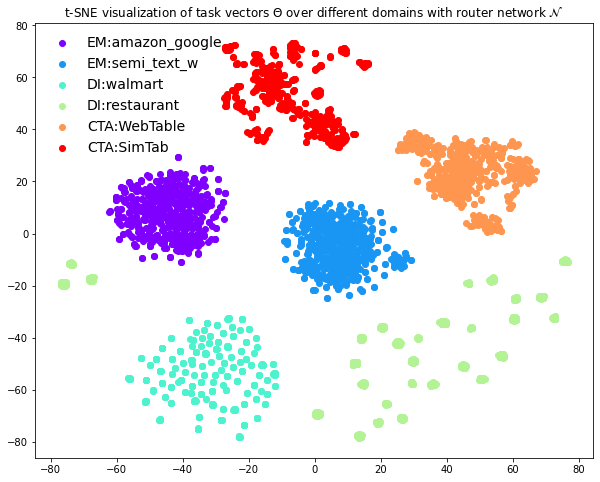

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def plot_tsne(matrices, perplexity=25, n_components=2, learning_rate=200):
    """
    绘制由多个矩阵组成的数据集的t-SNE图。
    
    :param matrices: 一个矩阵列表，每个矩阵包含若干个n维向量。
    :param perplexity: t-SNE的困惑度参数。
    :param n_components: t-SNE降维后的维数。
    :param learning_rate: t-SNE的学习率。
    """
    # 将所有矩阵合并为一个大矩阵，并记住每个原始矩阵的索引范围
    all_data = np.vstack(matrices)
    indices = np.hstack([[i] * len(m) for i, m in enumerate(matrices)])
    
    # 应用t-SNE降维
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate)
    tsne_results = tsne.fit_transform(all_data)
    
    # 绘图
    plt.figure(figsize=(10, 8))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(matrices)))
    for i, color in zip(range(len(matrices)), colors):
        plt.scatter(tsne_results[indices == i, 0], tsne_results[indices == i, 1], c=[color], label=list(matrix_dict.keys())[i].replace('Mistral|','').replace('-MoE-CT','').replace('amazon','EM:amazon').replace('semi_text_w','EM:semi_text_w').replace('walmart','DI:walmart').replace('restaurant','DI:restaurant').replace('webtable','CTA:WebTable').replace('SimTab','CTA:SimTab'))
    
    plt.legend(fontsize=14, framealpha=0)
    plt.title('t-SNE visualization of task vectors $\Theta$ over different domains with router network $\mathcal{N}$')
    plt.savefig('t-SNE.svg', format='svg')
    plt.show()
    
    plt.close()
    
# 示例：生成一些随机数据来测试这个函数
# np.random.seed(42)  # 为了可重复性
# matrix1 = np.random.normal(loc=0, scale=1, size=(100, 50))  # 100个50维向量
# matrix2 = np.random.normal(loc=5, scale=1, size=(100, 50))  # 另外100个50维向量，但中心不同
# matrix3 = np.random.normal(loc=-5, scale=1, size=(100, 50)) # 第三组100个50维向量，中心也不同



# 绘制t-SNE图
plot_tsne(matrix_list)


In [20]:
MoE_predict = []
for index,row in MoE_list.iterrows():
    MoE_predict.append([expert_list[a] for a in np.argsort(-similarity[index])])

In [21]:
MoE_list['expert_predict'] = MoE_predict

In [25]:
MoE_list.iloc[552,-1]

['Mistral|amazon_google-MoE-CT',
 'Mistral|semi_text_w-MoE-CT',
 'Mistral|SimTab-MoE-CT',
 'Mistral|walmart-MoE-CT',
 'Mistral|webtable-MoE-CT',
 'Mistral|restaurant-MoE-CT']

In [ ]:
### Calculate the Top-2 Expert